# **Feature Scaling**

is a crucial preprocessing step in machine learning where we transform the data to ensure that the features are on a similar scale. Many machine learning algorithms compute distances (e.g., Euclidean distance) or gradients that are highly sensitive to the magnitude of the input data. If one feature has a large range of values compared to others, it can dominate and distort the model's predictions. Feature scaling addresses this issue by bringing the features into comparable ranges.

Why Feature Scaling is Important:

1. **Improves Model Convergence**: Algorithms like Gradient Descent and its variants benefit from feature scaling as it makes the optimization process faster and more stable.

2. **Distance-based Algorithms**: Algorithms like KNN, K-Means clustering, and SVM rely on distance metrics. If the features have different ranges, the model could misinterpret the importance of features based on their magnitude.

3. **Regularization and PCA**: Feature scaling ensures that regularization techniques (like Lasso or Ridge) and dimensionality reduction methods (like PCA) treat all features equally.

Techniques for Feature Scaling

1. **Normalization (Min-Max Scaling)**
Normalization scales the data into a fixed range, typically between 0 and 1, or sometimes -1 and 1. It’s commonly used when you know that the distribution of data does not follow a Gaussian distribution, or when the algorithm expects the data to be within a particular range.

2. **Standardization (Z-Score Normalization)**
Standardization transforms the data to have a mean of 0 and a standard deviation of 1. It’s useful when the feature distribution follows a Gaussian distribution (bell-shaped curve) or when the algorithm assumes the data is normally distributed (e.g., logistic regression, linear regression, or SVM).




### Formula for Normalization

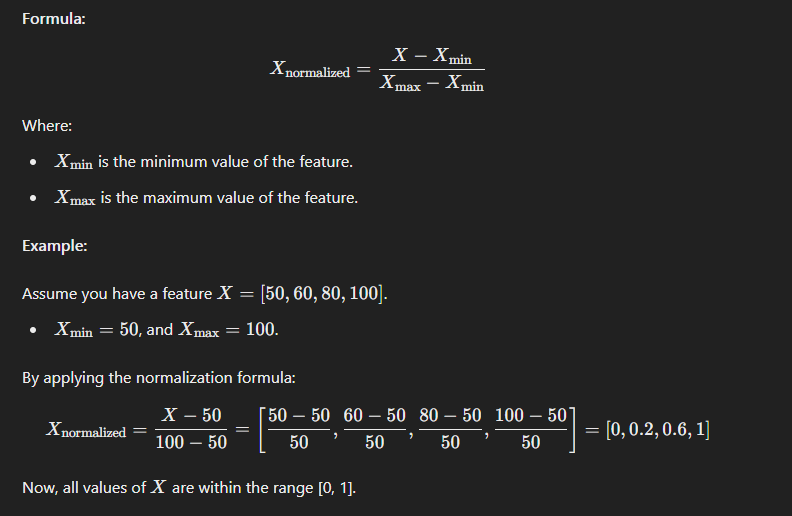

### Formula for Standardization

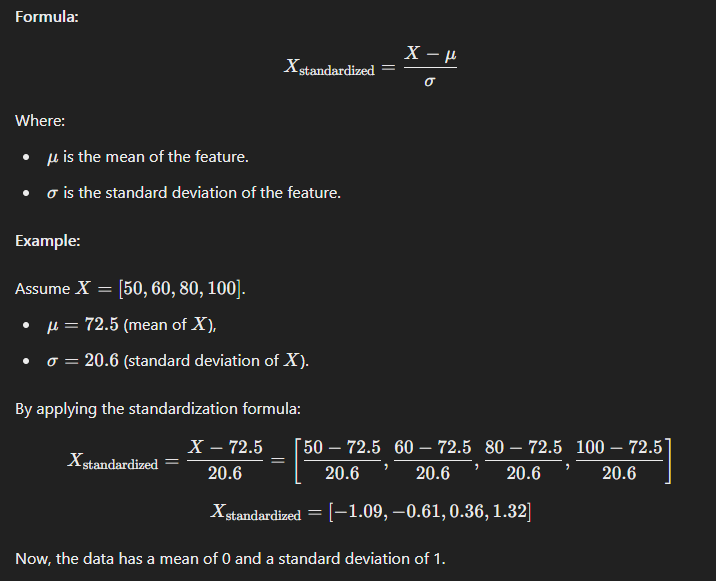

### When to Use Normalization vs. Standardization:
- Normalization is preferred for algorithms like:
    - Neural Networks (often benefit from data scaled between 0 and 1),
    - K-Nearest Neighbors (KNN),
    - Support Vector Machines (SVM) when using an RBF kernel.
- Standardization is preferred for:
    - Linear regression,
    - Logistic regression,
    - SVM (with linear kernel),
    - Principal Component Analysis (PCA),
    - Regularized models (Lasso, Ridge).

In [1]:
import pandas as pd

df = pd.read_csv('500hits.csv', encoding='latin-1')

df = df.drop(columns=['PLAYER', 'CS'])
df.describe().round(3)

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA,HOF
count,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000
mean,17.049,2048.699,7511.456,1150.314,2170.247,380.953,78.555,201.049,894.260,783.561,847.471,195.905,0.289,0.329
std,2.765,354.392,1294.066,289.635,424.191,96.483,49.363,143.623,486.193,327.432,489.224,181.846,0.021,0.475
min,11.000,1331.000,4981.000,601.000,1660.000,177.000,3.000,9.000,0.000,239.000,0.000,7.000,0.246,0.000
25%,15.000,1802.000,6523.000,936.000,1838.000,312.000,41.000,79.000,640.000,535.000,436.000,63.000,0.273,0.000
50%,17.000,1993.000,7241.000,1104.000,2076.000,366.000,67.000,178.000,968.000,736.000,825.000,137.000,0.287,0.000
75%,19.000,2247.000,8180.000,1296.000,2375.000,436.000,107.000,292.000,1206.000,955.000,1226.000,285.000,0.300,1.000
max,26.000,3308.000,12364.000,2295.000,4189.000,792.000,309.000,755.000,2297.000,2190.000,2597.000,1406.000,0.366,2.000


In [2]:
X1 = df.iloc[:, 0:13]

In [3]:
X2 = df.iloc[:, 0:13]

In [10]:
from sklearn.preprocessing import StandardScaler

scaleStandard = StandardScaler()
X1 = scaleStandard.fit_transform(X1)
X1 = pd.DataFrame(X1, columns=['YRS','G','AB','R','H','2B','3B','HR','RBI','BB','SO','SB','BA'])
X1.head()


,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA
0,2.516295,2.786078,3.034442,3.787062,4.764193,3.559333,4.389485,-0.585841,-0.346449,1.423013,-1.003628,3.832067,3.648290
1,1.792237,2.760655,2.677044,2.760530,3.444971,3.569709,1.996457,1.909487,2.175837,2.493089,-0.309948,-0.649080,1.996159
2,1.792237,2.091184,2.075964,2.528955,3.171214,4.264876,2.909053,-0.585841,-0.350567,1.826585,-1.283965,1.299723,2.657012
3,1.068180,1.972543,2.849554,2.670665,3.055576,1.691719,-0.254611,0.410896,0.858071,0.912434,2.030966,0.892346,1.004881
4,1.430208,2.099658,2.257758,2.024329,2.972977,2.687780,3.517449,-0.697364,-1.841290,0.548609,-1.065016,2.896201,1.901752


In [11]:
X1.describe().round(3)

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA
count,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-2.190,-2.027,-1.958,-1.899,-1.204,-2.116,-1.532,-1.339,-1.841,-1.665,-1.734,-1.040,-2.016
25%,-0.742,-0.697,-0.765,-0.741,-0.784,-0.715,-0.762,-0.851,-0.524,-0.760,-0.842,-0.732,-0.742
50%,-0.018,-0.157,-0.209,-0.160,-0.222,-0.155,-0.234,-0.161,0.152,-0.145,-0.046,-0.324,-0.081
75%,0.706,0.560,0.517,0.504,0.483,0.571,0.577,0.634,0.642,0.524,0.775,0.490,0.533
max,3.240,3.557,3.754,3.956,4.764,4.265,4.673,3.861,2.888,4.300,3.580,6.662,3.648


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaleMinMax = MinMaxScaler(feature_range=(0,1))
X2 = scaleMinMax.fit_transform(X2)
X2 = pd.DataFrame(X2, columns=['YRS','G','AB','R','H','2B','3B','HR','RBI','BB','SO','SB','BA'])
X2.head()

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA
0,0.866667,0.861912,0.874035,0.971074,1.000000,0.889431,0.954248,0.144772,0.316064,0.517683,0.137466,0.632595,1.000000
1,0.733333,0.857360,0.811459,0.795750,0.778964,0.891057,0.568627,0.624665,0.849369,0.697078,0.268002,0.050751,0.708333
2,0.733333,0.737481,0.706217,0.756198,0.733096,1.000000,0.715686,0.144772,0.315194,0.585341,0.084713,0.303788,0.825000
3,0.600000,0.716237,0.841663,0.780401,0.713721,0.596748,0.205882,0.336461,0.570744,0.432086,0.708510,0.250893,0.533333
4,0.666667,0.738998,0.738047,0.670012,0.699881,0.752846,0.813725,0.123324,0.000000,0.371092,0.125915,0.511079,0.691667


In [13]:
X2.describe().round(3)

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA
count,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000
mean,0.403,0.363,0.343,0.324,0.202,0.332,0.247,0.257,0.389,0.279,0.326,0.135,0.356
std,0.184,0.179,0.175,0.171,0.168,0.157,0.161,0.193,0.212,0.168,0.188,0.130,0.177
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.267,0.238,0.209,0.198,0.070,0.220,0.124,0.094,0.279,0.152,0.168,0.040,0.225
50%,0.400,0.335,0.306,0.297,0.164,0.307,0.209,0.227,0.421,0.255,0.318,0.093,0.342
75%,0.533,0.463,0.433,0.410,0.283,0.421,0.340,0.379,0.525,0.367,0.472,0.199,0.450
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
